**Cubic Spline Interpolation**

In [8]:
#imports
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import lstsq

In [9]:

x = []
f_x = []

with open('points.txt', 'r') as f:
    for line in f:
        point = line.split()
        x.append(float(point[0]))
        f_x.append(float(point[1]))

n = len(x)
n_splines = n - 1

# Calculate the coefficients

h = []
for i in range(n_splines):
    h.append(x[i+1] - x[i])

a = []
for i in range(n):
    a.append(f_x[i])

linear_system_A = []
offset = 0
linear_system_A.append([1] + [0]*(n_splines))
for i in range(n_splines-1):
    linear_system_A.append([0]*offset + [h[i]] + [2*(h[i] + h[i+1])] + [h[i+1]] + [0]*(n_splines-2-offset))
    offset += 1
linear_system_A.append([0]*(n_splines) + [1])

t = []
t.append(0)
for i in range(1, n_splines):
    t.append((3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1]))
t.append(0)

c = lstsq(linear_system_A, t, rcond=None)[0].tolist()

b = []
for i in range(n_splines):
    b.append((a[i+1] - a[i]) / h[i] - (h[i] * (c[i+1] + 2*c[i])) / 3)

d = []
for i in range(n_splines):
    d.append((c[i+1] - c[i]) / (3 * h[i]))\
    
# Print the results
print('results [i, x, f(x), h, a, b, c, d]:')
for i in range(n):
    if i != n_splines:
        print(f'| {i:5} | {x[i]:5.6f} | {f_x[i]:5.6f} | {h[i]:5.6f} | {a[i]:5.6f} | {b[i]:5.6f} | {c[i]:5.6f} | {d[i]:5.6f} |')
    else:
        print(f'| {i:5} | {x[i]:5.6f} | {f_x[i]:5.6f} |          | {a[i]:5.6f} |          | {c[i]:5.6f} |          |')

print('\ncomputing c:')

for i, row in enumerate(linear_system_A):
    for k in row:
        print(f"{k:.2f}", end=" ")
    print(f"| {t[i]:.2f}")

print('\nSpline equations:')
for i in range(n_splines):
    print(f"f{i+1}(x) = {a[i]:.6f} + {b[i]:.6f}(x - {x[i]:.2f}) + {c[i]:.6f}(x - {x[i]:.2f})^2 + {d[i]:.6f}(x - {x[i]:.2f})^3")


results [i, x, f(x), h, a, b, c, d]:
|     0 | 1.000000 | 1.000000 | 1.000000 | 1.000000 | -0.583320 | 0.000000 | 0.083320 |
|     1 | 2.000000 | 0.500000 | 1.000000 | 0.500000 | -0.333360 | 0.249960 | -0.083300 |
|     2 | 3.000000 | 0.333300 | 1.000000 | 0.333300 | -0.083340 | 0.000060 | -0.000020 |
|     3 | 4.000000 | 0.250000 |          | 0.250000 |          | -0.000000 |          |

computing c:
1.00 0.00 0.00 0.00 | 0.00
1.00 4.00 1.00 0.00 | 1.00
0.00 1.00 4.00 1.00 | 0.25
0.00 0.00 0.00 1.00 | 0.00

Spline equations:
f1(x) = 1.000000 + -0.583320(x - 1.00) + 0.000000(x - 1.00)^2 + 0.083320(x - 1.00)^3
f2(x) = 0.500000 + -0.333360(x - 2.00) + 0.249960(x - 2.00)^2 + -0.083300(x - 2.00)^3
f3(x) = 0.333300 + -0.083340(x - 3.00) + 0.000060(x - 3.00)^2 + -0.000020(x - 3.00)^3


***Plotting Spline Equations***

In [10]:
def evaluate(x, a, b, c, d, xi):
    return a + b*(x-xi) + c*(x-xi)**2 + d*(x-xi)**3

def get_plot_points(a, b, c, d, xi, start, end):
    x = np.linspace(start, end, 1000000)
    y = [evaluate(_x, a, b, c, d, xi) for _x in x]
    return x, y

<function matplotlib.pyplot.show(close=None, block=None)>

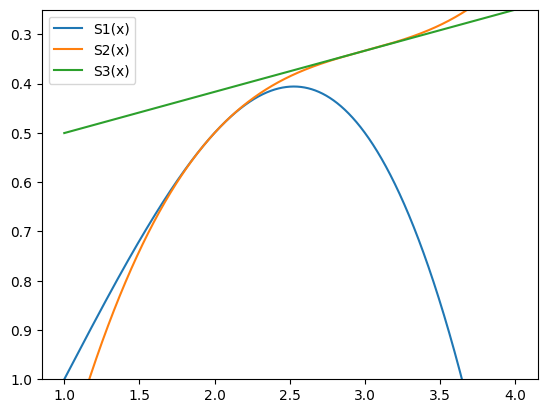

In [11]:
for i in range(n_splines):
    Sx, Sy = get_plot_points(a[i], b[i], c[i], d[i], x[i], x[0], x[-1])
    plt.plot(Sx, Sy, label=f"S{i+1}(x)")

ax = plt.gca()
ax.set_ylim([f_x[0], f_x[-1]])

plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

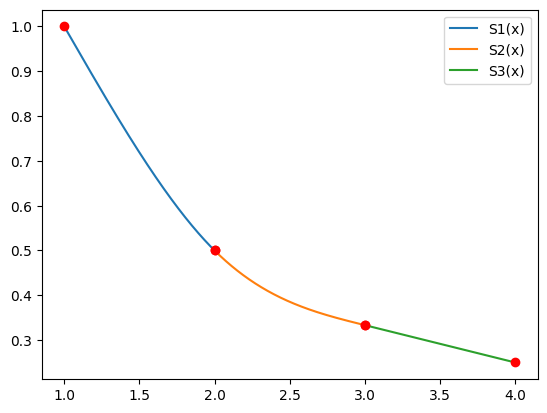

In [12]:
for i in range(n_splines):
    Sx, Sy = get_plot_points(a[i], b[i], c[i], d[i], x[i], x[i], x[i+1])
    plt.plot(Sx, Sy, label=f"S{i+1}(x)")
    plt.plot(x[i], f_x[i], 'ro')
    plt.plot(x[i+1], f_x[i+1], 'ro')

plt.legend()
plt.show

***Compute S(x)***


In [13]:
for i in range(n_splines):
    print(f"S{i}({x[i]}) = ", end=" ")
    print(evaluate(x[i], a[i], b[i], c[i], d[i], x[i]))
    print(f"S{i+1}({x[i+1]}) = ", end=" ")
    print(evaluate(x[i+1], a[i], b[i], c[i], d[i], x[i]))

S0(1.0) =  1.0
S1(2.0) =  0.49999999999999994
S1(2.0) =  0.5
S2(3.0) =  0.3333
S2(3.0) =  0.3333
S3(4.0) =  0.24999999999999997


In [14]:
val = float(input("Valor de X por evaluar:"))

found = False
for i in range(n_splines):
    if val >= x[i] and val < x[i+1]:
        print(f"S{i}({val}) = {evaluate(val, a[i], b[i], c[i], d[i], x[i])}")
        found = True
        break

if not found:
    print("Fuera de rango.")
              

S2(3.4) = 0.29997232
